In [86]:
import numpy as np
import matplotlib.pyplot as plt

# words scraped from https://www.bestwordlist.com/5letterwords.htm
words = np.load('five_letter_words.npy', allow_pickle=True)

# random word to test with
def generate_random_word():
    rand_word = words[np.random.randint(0, len(words))]
    
    return rand_word

def evaluate_input(target_word, input_word):
    let_eval = []
    for i in range(len(target_word)):
        let =  input_word[i]

        if let in target_word:
            inputword_l_i = [i for i, l in enumerate(input_word) if l == let]
            targetword_l_i = [i for i, l in enumerate(target_word) if l == let]
            
            # correct number of repeated letters or single letters
            if len(inputword_l_i) <= len(targetword_l_i):
                if i in targetword_l_i:
                    let_eval.append((let, 'green'))
                else:
                    let_eval.append((let, 'gold'))
                    
            # incorrectly repeated letters, with some in correct positions
            elif len(inputword_l_i) > len(targetword_l_i):
                if i in targetword_l_i:
                    let_eval.append((let, 'green'))
                
                elif inputword_l_i.index(i) + 1 <= len(targetword_l_i):
                    
                    # incorrectly repeated letters, with some in incorrect positions
                    if len(set(inputword_l_i).intersection(set(targetword_l_i))) < len(targetword_l_i):
                        let_eval.append((let, 'gold'))
                        
                    # incorrectly repeated letters will be marked grey after correct number of
                    # repeated letters are marked green and/or gold.
                    else:
                        let_eval.append((let, 'grey'))
                else:
                    let_eval.append((let, 'grey'))
        else:
            let_eval.append((let, 'grey')) # alliterative color names :-)
    return let_eval

def used_l(row, evals):
    used_l = []
    for letter in row:
        for l_eval in evals:
            for l, c in l_eval:
                if letter == l:
                    if c == 'grey':
                        used_l.append((l, 'white'))
                    else:
                        used_l.append((l, c))
    d_used_l = dict(used_l)
    
    return d_used_l

def plot_eval(let_evals):
    # xlim 6, we don't expect any words longer than 5 letters (+1 to center plot)
    # ylim 7, we don't expect more than 6 attempts (+1 to center plot)
    plt.figure(figsize=(6,7))
    f = plt.axis([0,6,0,7])
    
    for i in range(len(let_evals)):
        l_eval = let_evals[i] 
        
        for j in range(len(l_eval)):
            l, c = l_eval[j]
            plt.text(j+1, i+1, l, fontsize=35, color=c)
            
    R1 ='QWERTYUIOP'
    R1_x = np.arange(1.3,1.3+0.4*len(R1), 0.4)
    R1_y = 7
    d_R1 = dict(zip(R1, R1_x))

    R2 = 'ASDFGHJKL'
    R2_x = np.arange(1.5,1.5+0.4*len(R2), 0.4)
    R2_y = 7.4
    d_R2 = dict(zip(R2, R2_x))

    R3 = 'ZXCVBNM'
    R3_x = np.arange(1.6, 1.6+0.4*len(R3), 0.4)
    R3_y = 7.8
    d_R3 = dict(zip(R3, R3_x))

    d_R1_used = used_l(R1, let_evals)
    for l in d_R1_used.keys():
        plt.text(d_R1[l], R1_y, str(l), fontsize=16, c=d_R1_used[l])

    d_R2_used = used_l(R2, let_evals)
    for l in d_R2_used.keys():
        plt.text(d_R2[l], R2_y, str(l), fontsize=16, c=d_R2_used[l])

    d_R3_used = used_l(R3, let_evals)
    for l in d_R3_used.keys():
        plt.text(d_R3[l], R3_y, str(l), fontsize=16, c=d_R3_used[l])

    for i in range(len(R1)):
        if R1[i] not in d_R1_used.keys():
            plt.text(R1_x[i], R1_y, R1[i], fontsize=15)
        else:
            pass
    for i in range(len(R2)):
        if R2[i] not in d_R2_used.keys():
            plt.text(R2_x[i], R2_y, R2[i], fontsize=15)
        else:
            pass
    for i in range(len(R3)):
        if R3[i] not in d_R3_used.keys():
            plt.text(R3_x[i], R3_y, R3[i], fontsize=15)
        else:
            pass


    plt.axis('off')
    plt.gca().invert_yaxis() # starting from the top

    return f

[0, 6, 0, 7]

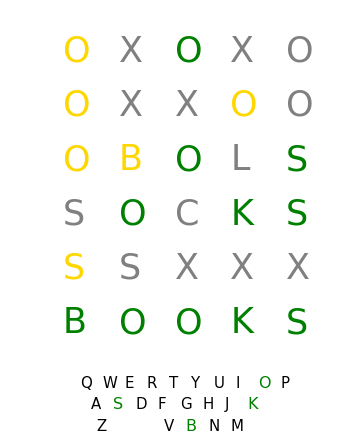

In [87]:
# ok now let's try a hypothetical situation by hand (with fake words to test edge cases)
target_word = 'BOOKS'
evals = []
evals.append(evaluate_input(target_word, 'OXOXO')) # correct repeated letter appears too many times, in one correct position
evals.append(evaluate_input(target_word, 'OXXOO')) # correct repeated letter appears too many times, in no correct positions
evals.append(evaluate_input(target_word, 'OBOLS')) # correct repeated letter appears in one correct position and one incorrect position
evals.append(evaluate_input(target_word, 'SOCKS')) # correct letter appears too many times, in one correct position
evals.append(evaluate_input(target_word, 'SSXXX')) # correct letter appears too many times, in no correct positions
evals.append(evaluate_input(target_word, 'BOOKS'))
plot_eval(evals)

In [88]:
target_word = generate_random_word()

[0, 6, 0, 7]

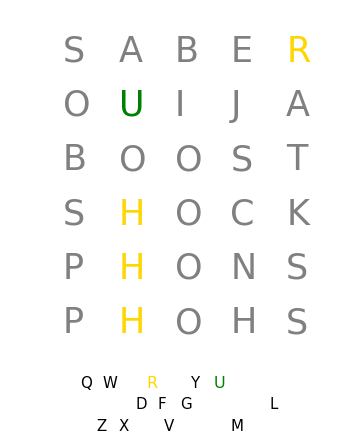

In [89]:
evals = []
evals.append(evaluate_input(target_word,'SABER'))
evals.append(evaluate_input(target_word,'OUIJA'))
evals.append(evaluate_input(target_word,'BOOST'))
evals.append(evaluate_input(target_word,'SHOCK'))
evals.append(evaluate_input(target_word,'PHONS')) 
evals.append(evaluate_input(target_word,'PHOHS')) # WTF DOES 'PHOHS' MEAN
plot_eval(evals)

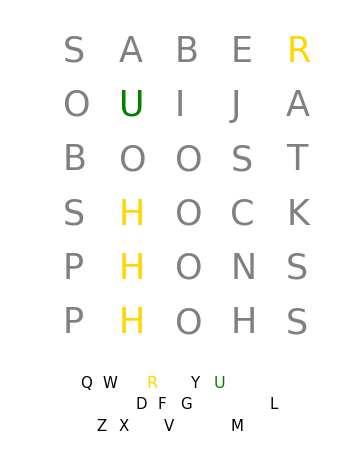

In [90]:
plt.figure(figsize=(6,8))
f = plt.axis([0,6,0,8])

for i in range(len(evals)):
    l_eval = evals[i] 

    for j in range(len(l_eval)):
        l, c = l_eval[j]
        plt.text(j+1, i+1, l, fontsize=35, color=c)

R1 ='QWERTYUIOP'
R1_x = np.arange(1.3,1.3+0.4*len(R1), 0.4)
R1_y = 7
d_R1 = dict(zip(R1, R1_x))
    
R2 = 'ASDFGHJKL'
R2_x = np.arange(1.5,1.5+0.4*len(R2), 0.4)
R2_y = 7.4
d_R2 = dict(zip(R2, R2_x))
    
R3 = 'ZXCVBNM'
R3_x = np.arange(1.6, 1.6+0.4*len(R3), 0.4)
R3_y = 7.8
d_R3 = dict(zip(R3, R3_x))

d_R1_used = used_l(R1, evals)
for l in d_R1_used.keys():
    plt.text(d_R1[l], R1_y, str(l), fontsize=16, c=d_R1_used[l])
    
d_R2_used = used_l(R2, evals)
for l in d_R2_used.keys():
    plt.text(d_R2[l], R2_y, str(l), fontsize=16, c=d_R2_used[l])
    
d_R3_used = used_l(R3, evals)
for l in d_R3_used.keys():
    plt.text(d_R3[l], R3_y, str(l), fontsize=16, c=d_R3_used[l])
    
for i in range(len(R1)):
    if R1[i] not in d_R1_used.keys():
        plt.text(R1_x[i], R1_y, R1[i], fontsize=15)
    else:
        pass
for i in range(len(R2)):
    if R2[i] not in d_R2_used.keys():
        plt.text(R2_x[i], R2_y, R2[i], fontsize=15)
    else:
        pass
for i in range(len(R3)):
    if R3[i] not in d_R3_used.keys():
        plt.text(R3_x[i], R3_y, R3[i], fontsize=15)
    else:
        pass


plt.axis('off')
plt.gca().invert_yaxis() # starting from the top

In [91]:
def used_l(row, evals):
    used_l = []
    for letter in R2:
        for l_eval in evals:
            for l, c in l_eval:
                if letter == l:
                    if c == 'grey':
                        used_l.append((l, 'white'))
                    else:
                        used_l.append((l, c))
    d_used_l = dict(used_l)
    
    return d_used_l

d_R2_used = used_l(R2, evals)

In [92]:
p_words = np.load('five_letter_words.npy')
np.save('p_words.npy', p_words)

def suggestion(evals):
    p_words = np.load('p_words.npy')
    for l_eval in evals:
        for i, (l, c) in enumerate(l_eval):
            if c == 'grey':
                p_words = [word for word in p_words if l not in word]
            if c == 'gold':
                p_words = [word for word in p_words if l in word]
                p_words = [word for word in p_words if (i, l) not in [(ii, ll) for ii, ll in enumerate(word)]]

In [118]:
p_words = np.load('p_words.npy')
print(len(p_words))
for l_eval in evals:
    for i, (l, c) in enumerate(l_eval):
     
        if c == 'grey':
            p_words = [word for word in p_words if l not in word]
            
        if c == 'gold':
            # two tests: check if letter is in word
            p_words = [word for word in p_words if l in word]
            
            # check if letter is in correct position
            p_words = [word for word in p_words if (i, l) not in [(j, let) for j, let in enumerate(word)]]
            
        if c == 'green':
            # two tests: check if letter is in word
            p_words = [word for word in p_words if l in word]
            
            # check if letter is in correct position
            p_words = [word for word in p_words if (i, l) in [(j, let) for j, let in enumerate(word)]]

p_words

12478


[]

In [78]:
test_words = ['ROUTE', 'BOOKS', 'SORRY']
(0,'R') in [[(i, l) for i, l in enumerate(word)] for word in p_words]
word

'AAHED'

In [63]:
p_words = [word[k] for k in range(len(word_i)) if (l, c) in word_i[k]]

In [65]:
(l, c)

('S', 'grey')